In [1]:

import pandas as pd
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import csv
import requests
import textwrap

!pip install google-play-scraper
from google_play_scraper import app, reviews, Sort, reviews_all

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from io import StringIO
from wordcloud import WordCloud



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.4 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [2]:
!pip install imblearn

In [3]:
app_reviews_df = pd.read_csv('myim3_ulasan.csv')

In [4]:
app_reviews_df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,739d5db5-56d3-4635-8ced-799c6e4ea0f0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi mu bikin kecewa. beli paket kuota sam...,2,29,82.10.0,2025-10-05 15:29:00,"Hai Bapak/Ibu, maaf sebelumnya. Kami akan beru...",2025-10-06 03:58:55,82.10.0
1,513aace9-8e3b-4056-b6a0-1ee25a373b28,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Halo min, aku mau mengadukan keluhan, im3 akhi...",2,158,82.9.0,2025-09-19 13:43:13,Mohon maaf Ibu Jannatun. Silahkan lakukan rest...,2025-09-20 02:35:05,82.9.0
2,71796292-75d2-4415-aec6-7ac3b4618291,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"1. Padahal paket data masih ada, tapi kenapa p...",1,484,82.9.0,2025-08-23 12:05:27,"Hai Sahabat, maaf sebelumnya. Untuk bisa memba...",2025-08-24 08:46:36,82.9.0
3,dd191f04-c029-47a1-b7c4-0667104bb889,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sinyal sering eror apalagi kalo hujan dan puls...,2,124,82.9.0,2025-09-17 07:49:44,"Selamat Sore Ibu Siti, maaf sebelumnya. Silaka...",2025-09-17 09:01:40,82.9.0
4,259ead41-5f78-4651-80b8-ee3f37a7dfc2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sering banget potong saldo pulsa tanpa keteran...,1,102,82.9.0,2025-09-29 03:26:12,"Selamat siang Ibu Jeneayu, mohon maaf atas pen...",2025-09-29 05:26:04,82.9.0
5,e1de580c-1fb1-4b84-a274-b0414c599dbb,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kuota mahal mahal jaringan malah lemot, bahkan...",1,21,82.9.0,2025-10-06 15:21:56,Hai Bapak Armi. Penyesuaian harga dilakukan se...,2025-10-07 06:36:49,82.9.0
6,ae0e67ec-a5b2-4876-9d8b-16fa527e20b6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Mohon maaf min, akhir² ini internet down parah...",1,463,82.9.0,2025-08-11 04:06:11,"Selamat Malam Ibu Aprillia, mohon maaf sebelum...",2025-08-11 12:51:41,82.9.0
7,afb2cb69-e6ee-4f3b-b3e8-986ebece9d1c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,dari segi sinyal sudah bagus di tempat saya ba...,4,32,82.9.0,2025-10-07 10:29:46,NaN,NaN,82.9.0
8,5909e66e-9963-4144-b4a4-0e61d7ea6c16,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kegiatan saya adalah bepergian berpindah-pinda...,1,34,82.10.0,2025-10-05 17:44:43,"Hai Kak Adetian, maaf udah bikin gak nyaman. S...",2024-07-06 01:37:46,82.10.0
9,2b763842-3ed8-43d6-99bb-8dc76633c0b8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mohon perbaiki pelayanan customer service untu...,1,43,82.9.0,2025-09-30 07:36:22,"Hi Kak Erik, maaf banget karna akses internetn...",2022-06-08 09:44:17,82.9.0


In [5]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229500 entries, 0 to 229499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              229500 non-null  object
 1   userName              229500 non-null  object
 2   userImage             229500 non-null  object
 3   content               229500 non-null  object
 4   score                 229500 non-null  int64 
 5   thumbsUpCount         229500 non-null  int64 
 6   reviewCreatedVersion  176908 non-null  object
 7   at                    229500 non-null  object
 8   replyContent          128185 non-null  object
 9   repliedAt             128185 non-null  object
 10  appVersion            176908 non-null  object
dtypes: int64(2), object(9)
memory usage: 19.3+ MB


In [6]:
cleaned_df = app_reviews_df.dropna()

In [7]:
cleaned_df= cleaned_df.drop_duplicates()

if cleaned_df.duplicated().any():
    print("Terdapat data duplikat dalam DataFrame IM3reviews")
else:
    print("Tidak ada data duplikat dalam DataFrame IM3reviews")

Tidak ada data duplikat dalam DataFrame IM3reviews


In [8]:
# Menghitung jumlah baris dan kolom setelah menghapus duplikat
jumlah_baris, jumlah_kolom = cleaned_df.shape
print(f'Jumlah baris: {jumlah_baris}, Jumlah kolom: {jumlah_kolom}')

Jumlah baris: 93459, Jumlah kolom: 11


In [9]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93459 entries, 0 to 229493
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              93459 non-null  object
 1   userName              93459 non-null  object
 2   userImage             93459 non-null  object
 3   content               93459 non-null  object
 4   score                 93459 non-null  int64 
 5   thumbsUpCount         93459 non-null  int64 
 6   reviewCreatedVersion  93459 non-null  object
 7   at                    93459 non-null  object
 8   replyContent          93459 non-null  object
 9   repliedAt             93459 non-null  object
 10  appVersion            93459 non-null  object
dtypes: int64(2), object(9)
memory usage: 8.6+ MB


In [10]:
cleaned_df.isnull().sum()

,0
reviewId,0
userName,0
userImage,0
content,0
score,0
thumbsUpCount,0
reviewCreatedVersion,0
at,0
replyContent,0
repliedAt,0


## Preprocessing Txt

In [11]:
!pip install sastrawi
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [12]:
# Fungsi untuk memastikan output paragraf tetap rapi
def print_paragraph(text):
    # Membatasi lebar teks menjadi 70 karakter per baris
    wrapped_text = textwrap.fill(text, width=70)
    print(wrapped_text)

def cleaningTxt(text):
  text = re.sub(r'http\S+', '', text) #menghapus URL
  text = re.sub(r'#\S+', '', text) #Menghapus hastag
  text = re.sub(r'RT|@\w+', '', text) #Menghapus RT, dan mentions (username)
  text = re.sub(r'\d+', '', text) #Menghapus angka
  text = re.sub(r'[^\w\s]', '', text) #Menghapus tanda baca
  text = text.replace('\n', ' ') #Menghapus baris baru
  text = text.strip() #Menghapus spasi di awal dan akhir teks
  return text

# Memisahkan teks menjadi kata-kata
def tokenizingTxt(text):
  text = word_tokenize(text)
  return text

# Mengubah semua karakter dalam teks menjadi huruf kecil
def lowercasingTxt(text):
  text = text.lower()
  return text

def filteringTxt(text):
    # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['lah', 'tuh', 'nih', 'iya', 'yaa', 'gak', 'nya', 'na',
                          'sih', 'ku', 'di', 'ga', 'ya', 'deh', ])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def fix_SlangWords(text):
    slangwordsDict = {
    "crash": "error",
    "ngadat": "error",
    "gagal login": "gagal masuk",
    "lemot": "lambat",
    "not responding": "tidak merespon",
    "sinyal lemah": "sinyal buruk",
    "no signal": "tidak ada sinyal",
    "lelet": "lambat",
    "putus-putus": "terputus-putus",
    "cs": "customer service",
    "ga bales": "tidak merespons",
    "layanannya jelek": "pelayanan buruk",
    "malah makin parah": "semakin buruk",
    "gak bisa": "tidak bisa",
    "ga ngerti": "tidak mengerti",
    "bosen": "bosan",
    "tidak puas": "tidak senang",
    "mahal": "harga tinggi",
    "boros": "memboroskan",
    "wtb": "beli",
    "wts": "masih",
    "wtf": "bingung",
    "bngt": "banget",
    "yt" : "Youtube",
    "gk" : "tidak",
    "rata kiri" : "paling rendah",
    "rata kanan"  : "paling tinggi",
    "dgn" : "dengan",
    "bbrp" : "beberapa",
    "sgt" : "sangat",
    "yg" : "yang",
    "ttp" : "tetap",
    "maketin" : "membeli paket",
    "ngisi" : "mengisi",
    "paketan" : "paket kuota",
    "kesedot" : "terambil",
    "sy" : "saya",
    "bae" : "aja",
    "knp" : "kenapa",
    "knpa" : "kenapa",
    "bgmn" : "bagaimana",
    "ga" : "tidak",
    "nga" : "tidak",
    "cmn" : "hanya",
    "jgn" : "jangan",
    "pengen" : "ingin",
    "pgn" : "ingin",
    "dr" : "dari",
    "ampe" : "sampai",
    "kaya" : "seperti",
    "kyk" : "seperti",
    "ky": "seperti",
    "brg" : "bareng",
    "sblm" : "sebelum",
    "sdh" : "sudah",
    "udh" : "sudah",
    "lgi" : "lagi",
    "lg" : "lagi",
    "cpt" : "cepat",
    "gt" : "gitu",
    "gtu" : "gitu",
    "aj" : "saja",
    "tp" : "tapi",
    "tpi" : "tapi",
    }
    words = text.split()
    fixed_words = [slangwordsDict.get(word, word) for word in words]
    return ' '.join(fixed_words)



# Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
def stemmingTxt(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    word = text.split()
    stemmedWord = [stemmer.stem(word) for word in text]
    stemmedText = ' '.join(stemmedWord)
    return stemmedText


def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence



In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
cleaned_df['text_clean'] = cleaned_df['content'].apply(cleaningTxt)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
cleaned_df['text_casefoldingText'] = cleaned_df['text_clean'].apply(lowercasingTxt)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
cleaned_df['text_slangwords'] = cleaned_df['text_casefoldingText'].apply(fix_SlangWords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
cleaned_df['text_tokenizingText'] = cleaned_df['text_slangwords'].apply(tokenizingTxt)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
cleaned_df['text_stopword'] = cleaned_df['text_tokenizingText'].apply(filteringTxt)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
cleaned_df['text_akhir'] = cleaned_df['text_stopword'].apply(toSentence)


## Pelabelan

In [14]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [15]:
# Fungsi untuk menentukan polaritas sentimen

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
results = cleaned_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
cleaned_df['polarity_score'] = results[0]
cleaned_df['polarity'] = results[1]
print(cleaned_df['polarity'].value_counts())

polarity
negative    59129
positive    34330
Name: count, dtype: int64


In [17]:
import csv
import requests
from io import StringIO

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        # Hanya tambahkan kata ke kamus jika bukan 'bagus' atau 'mulus'
        if row[0] != 'bagus' and row[0] != 'mulus':
            lexicon_negative[row[0]] = int(row[1])
    print("Kamus negatif berhasil diperbarui (kata 'bagus' dan 'mulus' dihapus).")
else:
    print("Gagal mengambil data kamus negatif dari GitHub.")

# Anda bisa mencetak sebagian kamus untuk memverifikasi (opsional)
# print(list(lexicon_negative.items())[:10])

Kamus negatif berhasil diperbarui (kata 'bagus' dan 'mulus' dihapus).


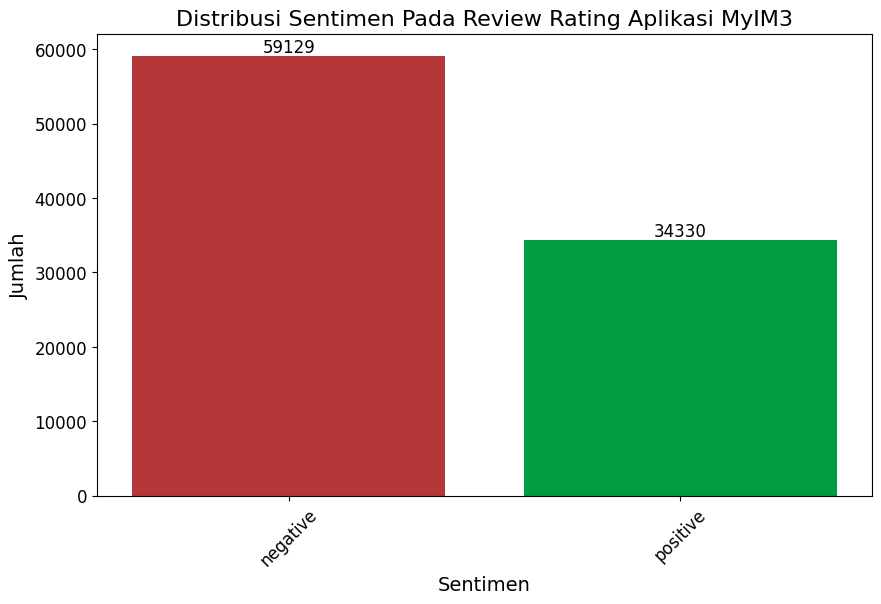

In [18]:
# Menghitung jumlah sentimen dari kolom 'polarity'
sentiment_data = cleaned_df['polarity'].value_counts().to_dict()


# Membuat diagram batang yang lebih unik dengan warna-warna cerah dan font yang lebih jelas
plt.figure(figsize=(10, 6))
plt.bar(sentiment_data.keys(), sentiment_data.values(), color=["#B53737", "#009C41"])
plt.title('Distribusi Sentimen Pada Review Rating Aplikasi MyIM3', fontsize=16)
plt.xlabel('Sentimen', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Menambahkan angka pada setiap batang
for i, v in enumerate(sentiment_data.values()):
    plt.text(i, v + 500, str(v), ha='center', fontsize=12)

# Menampilkan diagram
plt.show()

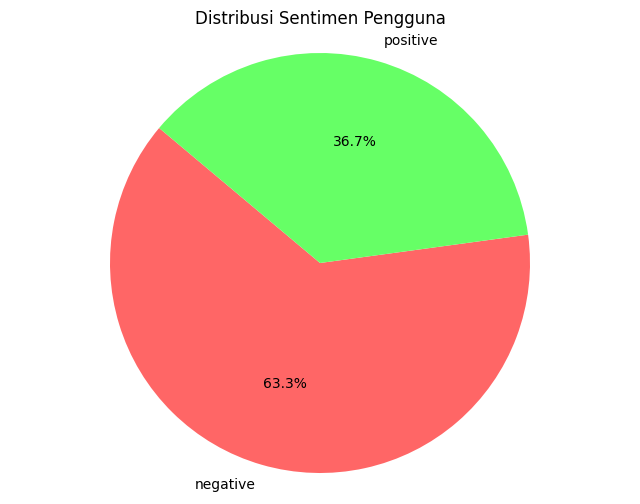

In [19]:
# Membuat diagram pie yang unik dan menarik
plt.figure(figsize=(8, 6))
plt.pie(sentiment_data.values(), labels=sentiment_data.keys(), autopct='%1.1f%%', startangle=140, colors=["#FF6666", "#66FF66", "#FFFF66"])
plt.title('Distribusi Sentimen Pengguna')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

In [20]:
X = cleaned_df['text_akhir']
y = cleaned_df['polarity']

print("First few entries of X:")
print(X.head(1000))
print("\nFirst few entries of y:")
print(y.head(1000))
print ("\nd")



First few entries of X:
0       aplikasi mu bikin kecewa beli paket kuota samp...
1       halo min mengadukan keluhan im akhirakhir lamb...
2       paket data pulsanya dipake terambil pulsanya d...
3       sinyal eror kalo hujan pulsa bgt ilang keambil...
4       banget potong saldo pulsa keterangan dicek riw...
                              ...                        
1289    kalo nelpon customer service bbgd kbylan iklan...
1291    tolong diperhatikan isi pulsa x masuk system e...
1292    indosat hobi banget ngambil pulsa nganggur dip...
1293    teruntuk nanya beli paket gb bonus gbhari nany...
1294    edit ulasanya kasih bintang bagus kasih bintan...
Name: text_akhir, Length: 1000, dtype: object

First few entries of y:
0       negative
1       negative
2       negative
3       negative
4       positive
          ...   
1289    negative
1291    negative
1292    negative
1293    negative
1294    negative
Name: polarity, Length: 1000, dtype: object

d


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets.



In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (74767,)
Shape of X_test: (18692,)
Shape of y_train: (74767,)
Shape of y_test: (18692,)


## Feature extraction

### Subtask:
Convert the text data into numerical features using a suitable method (e.g., TF-IDF).


**Reasoning**:
Convert the text data into numerical features using TF-IDF as instructed.



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

Shape of X_train_tfidf: (74767, 59877)
Shape of X_test_tfidf: (18692, 59877)


In [23]:
from imblearn.over_sampling import SMOTE

# Inisialisasi SMOTE
smote = SMOTE(random_state=seed)

# Terapkan SMOTE pada data latih (X_train_tfidf dan y_train)
# Catatan: SMOTE sebaiknya diterapkan setelah TF-IDF jika menggunakan TF-IDF
# Jika SMOTE diterapkan sebelum TF-IDF, TF-IDF perlu dilatih ulang pada data yang sudah di-SMOTE
# Dalam kasus ini, karena TF-IDF sudah dilatih pada data asli, kita terapkan SMOTE setelahnya.
# Jika data sangat besar, ini mungkin memakan waktu.

X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)

# Periksa distribusi kelas setelah SMOTE
import pandas as pd
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Shape of X_train_resampled: (94698, 59877)
Shape of y_train_resampled: (94698,)

Class distribution after SMOTE:
polarity
positive    47349
negative    47349
Name: count, dtype: int64


## Model training

### Subtask:
Train a classification model (e.g., Naive Bayes, SVM, Logistic Regression) on the training data.


**Reasoning**:
Train a classification model (Logistic Regression) on the TF-IDF transformed training data.



In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear') # Added C and penalty parameters

model.fit(X_train_tfidf, y_train)

LogisticRegression(solver='liblinear')

## Model evaluation


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9380
Precision: 0.9379
Recall: 0.9380
F1-score: 0.9377


## Accuracy analysis

### Subtask:
Analyze the accuracy of the model on both the training and testing sets.


**Reasoning**:
Predict the sentiment labels for the training set and calculate the accuracy for both training and testing sets, then print and compare the accuracies.



In [26]:
y_train_pred = model.predict(X_train_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

print("\nComparison of Training and Testing Accuracy:")
if abs(train_accuracy - test_accuracy) < 0.01:
    print("The training and testing accuracies are very similar, suggesting the model is not significantly overfitting.")
elif train_accuracy > test_accuracy:
    print("The training accuracy is higher than the testing accuracy, which might indicate some overfitting.")
else:
    print("The testing accuracy is higher than the training accuracy, which is unusual and might warrant further investigation.")

Training Accuracy: 0.9626
Testing Accuracy: 0.9380

Comparison of Training and Testing Accuracy:
The training accuracy is higher than the testing accuracy, which might indicate some overfitting.


## Model Training: Support Vector Machine (SVM)

### Subtask:
Train a Support Vector Machine model on the training data.

**Reasoning**:
Train an SVM classification model on the TF-IDF transformed training data as requested.

In [27]:
from sklearn.svm import SVC

# Inisialisasi model SVM (gunakan kernel linear untuk efisiensi pada data besar)
svm_model = SVC(kernel='linear', random_state=seed)

# Latih model SVM
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=0)

## Model Evaluation: Support Vector Machine (SVM)

### Subtask:
Evaluate the trained SVM model on the testing data.

**Reasoning**:
Evaluate the trained SVM model using accuracy, precision, recall, and F1-score.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data testing
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Model Metrics:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-score: {f1_svm:.4f}")

SVM Model Metrics:
Accuracy: 0.9506
Precision: 0.9505
Recall: 0.9506
F1-score: 0.9505


## Model Training: Random Forest

### Subtask:
Train a Random Forest classifier on the training data.

**Reasoning**:
Train a Random Forest classification model on the TF-IDF transformed training data as requested.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=seed) # Anda bisa menyesuaikan n_estimators

# Latih model Random Forest
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=0)

## Model Evaluation: Random Forest

### Subtask:
Evaluate the trained Random Forest model on the testing data.

**Reasoning**:
Evaluate the trained Random Forest model using accuracy, precision, recall, and F1-score.

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Prediksi pada data testing
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluasi model Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Model Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

Random Forest Model Metrics:
Accuracy: 0.8525
Precision: 0.8586
Recall: 0.8525
F1-score: 0.8470


In [31]:
print(" Pengetesan 1\n")
kalimat_baru = input("Masukkan kalimat baru: \n")
kalimat_baru_cleaned = cleaningTxt(kalimat_baru)
kalimat_baru_casefolded = lowercasingTxt(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_SlangWords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingTxt(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringTxt(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)
print(f"\nHasil preprocessing: {kalimat_baru_final}")
score, polarity = sentiment_analysis_lexicon_indonesia(kalimat_baru_filtered)
print(f"\nSentimen berdasarkan lexicon: Skor = {score}")
print(f"\n \n Kategori Polaritas = {polarity}".upper())

 Pengetesan 1

Masukkan kalimat baru: 
penggunaan aplikasi nya simpel, dan banyak promo pembelian paketnya, kalo bisa di tingkatkan promo nya lagi supaya tmbh bnyk lagi usernya.

Hasil preprocessing: penggunaan aplikasi simpel promo pembelian paketnya kalo tingkatkan promo tmbh bnyk usernya

Sentimen berdasarkan lexicon: Skor = 6

 
 KATEGORI POLARITAS = POSITIVE


In [32]:
# Buat requirements.txt
!pip freeze --local > requirements.txt

# Download ke komputer
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>